In [3]:
!pip3 install torch torchvision matplotlib pytorch-lightning scikit-learn

     |████████████████████████████████| 582 kB 5.2 MB/s 
     |████████████████████████████████| 136 kB 54.2 MB/s 
     |████████████████████████████████| 408 kB 51.3 MB/s 
     |████████████████████████████████| 596 kB 47.5 MB/s 
     |████████████████████████████████| 1.1 MB 34.0 MB/s 
     |████████████████████████████████| 271 kB 56.6 MB/s 
     |████████████████████████████████| 144 kB 44.6 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/'Colab Notebooks'/tum-ai
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/tum-ai
covtest_recognizer_300_100_colour.onnx  model_squeezenet.model.zip
covtest_recognizer_300_224_colour.onnx  src/
data/                                   TUM-AI.ipynb
lightning_logs/


In [5]:
import pytorch_lightning as pl
import torchvision.transforms as transforms
from torch.utils import data
from torchvision import datasets
from src.model_impl import MyModel
from sklearn.model_selection import train_test_split
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

%load_ext autoreload
%autoreload 2

# Load dataset

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((300, 224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_ratio = 0.2
val_ratio = 0.15

dataset = datasets.ImageFolder("data", transform=transform)


usage_indices, test_indices = train_test_split(list(range(len(dataset.targets))), 
                                               test_size=test_ratio, 
                                               stratify=dataset.targets)

usage_targets = np.array(dataset.targets)[usage_indices]
train_indices, val_indices = train_test_split(list(range(len(usage_indices))), 
                                              test_size=val_ratio, 
                                              stratify=usage_targets)

usage_indices = np.array(usage_indices)
train_indices = usage_indices[train_indices]
val_indices = usage_indices[val_indices]

test_set = data.Subset(dataset, test_indices)
train_set = data.Subset(dataset, train_indices)
val_set = data.Subset(dataset, val_indices)

test_loader = data.DataLoader(test_set, batch_size=len(test_set), shuffle=True, num_workers=4)
train_loader = data.DataLoader(train_set, batch_size=170, shuffle=True, num_workers=4)
val_loader = data.DataLoader(val_set, batch_size=len(val_set), shuffle=True, num_workers=4)
print("full dataset", len(dataset))
print("test set", len(test_set))
print("validation set", len(val_set))
print("train set", len(train_set))



full dataset 1786
test set 358
validation set 215
train set 1213


## Batch Sample

torch.Size([3, 300, 224])


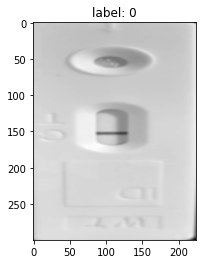

In [18]:
import matplotlib.pyplot as plt

batch = next(iter(train_set))
print(batch[0].shape)
plt.title("label: " + str(batch[1]))
plt.imshow(batch[0][0], cmap='gray')
image_size = batch[0].shape


# Train model

In [ ]:
model = MyModel(image_size, 1, lr=0.001)
trainer = pl.Trainer(max_epochs=100,  callbacks=[EarlyStopping(monitor="val_loss", mode="min", patience=7)],
                     accelerator="gpu", devices=1)
history = trainer.fit(model, train_loader, val_loader)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type        | Params
--------------------------------------------------
0 | feature_extractor | MobileNetV2 | 3.5 M 
1 | classifier        | Linear      | 1.0 K 
2 | model             | Sequential  | 3.5 M 
--------------------------------------------------
1.0 K     Trainable params
3.5 M     Non-trainable params
3.5 M     Total params
14.023    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

tensor(0.0947, device='cuda:0') 0.5258948971820259


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

tensor(0.0681, device='cuda:0') 0.7557121096725057


Validation: 0it [00:00, ?it/s]

tensor(0.0439, device='cuda:0') 0.8314927646610815


Validation: 0it [00:00, ?it/s]

tensor(0.0445, device='cuda:0') 0.7595201827875095


Validation: 0it [00:00, ?it/s]

tensor(0.0441, device='cuda:0') 0.8103579588728104


Validation: 0it [00:00, ?it/s]

tensor(0.0505, device='cuda:0') 0.7842726580350343


Validation: 0it [00:00, ?it/s]

tensor(0.0433, device='cuda:0') 0.829017517136329


Validation: 0it [00:00, ?it/s]

tensor(0.0430, device='cuda:0') 0.8029322162985529


Validation: 0it [00:00, ?it/s]

tensor(0.0474, device='cuda:0') 0.7842726580350343


Validation: 0it [00:00, ?it/s]

tensor(0.0398, device='cuda:0') 0.8364432597105864


Validation: 0it [00:00, ?it/s]

tensor(0.0520, device='cuda:0') 0.7842726580350343


Validation: 0it [00:00, ?it/s]

tensor(0.0474, device='cuda:0') 0.8029322162985529


Validation: 0it [00:00, ?it/s]

tensor(0.0474, device='cuda:0') 0.7768469154607769


Validation: 0it [00:00, ?it/s]

tensor(0.0493, device='cuda:0') 0.8128332063975628


Validation: 0it [00:00, ?it/s]

tensor(0.0472, device='cuda:0') 0.8512947448591013


Validation: 0it [00:00, ?it/s]

tensor(0.0543, device='cuda:0') 0.7246763137852247


Validation: 0it [00:00, ?it/s]

tensor(0.0439, device='cuda:0') 0.8202589489718203


In [ ]:
trainer.test(model, dataloaders=test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

[[286  50]
 [  1  21]]
0.8511904761904762
0.9545454545454546
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9028679653679654
        test_loss           0.04104708135128021
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_acc': 0.9028679653679654, 'test_loss': 0.04104708135128021}]

# Export model to ONNX

In [ ]:
import torch.onnx

batch_size=1

if False:
  x = torch.randn(batch_size, image_size[0], image_size[1], image_size[2], requires_grad=True)
  torch_out = model(x)

  # Export the model
  torch.onnx.export(model,               # model being run
                    x,                         # model input (or a tuple for multiple inputs)
                    "covtest_recognizer.onnx",   # where to save the model (can be a file or file-like object)
                    export_params=True,        # store the trained parameter weights inside the model file
                    opset_version=7,          # the ONNX version to export the model to
                    do_constant_folding=True,  # whether to execute constant folding for optimization
                    input_names = ['input'],   # the model's input names
                    output_names = ['output'], # the model's output names
                    dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                  'output' : {0 : 'batch_size'}})